In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

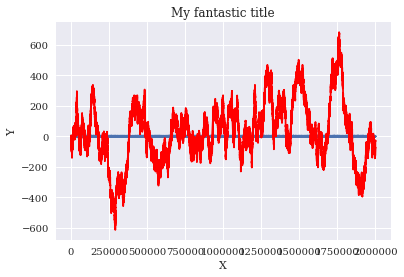

In [10]:
import numpy as np
import random

np.random.seed(random.randint(0, 10000))
y = np.random.standard_normal(2000000)

x = np.arange(len(y))
plt.title("My fantastic title")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y);
plt.plot(y.cumsum(),'r');

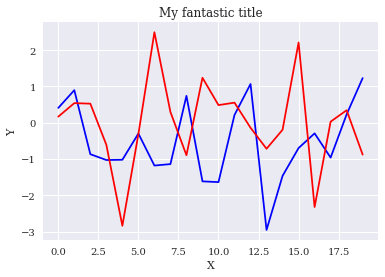

In [36]:
np.random.seed(random.randint(0, 10000))
y = np.random.standard_normal((7, 20))

x = np.arange(len(y))
plt.title("My fantastic title")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(y[0],'b');
plt.plot(y[1],'r');

Text(0,0.5,'value')

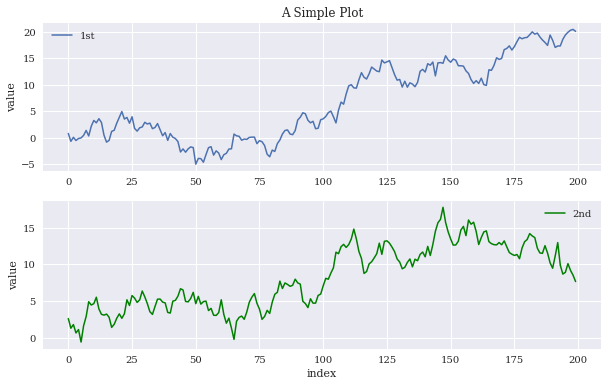

In [55]:
np.random.seed(random.randint(0, 10000))
y = np.random.standard_normal((200, 2))

plt.figure(figsize=(10, 6))
plt.subplot(211)  
plt.plot(y[:, 0].cumsum(), lw=1.5, label='1st')
# plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(212)  
plt.plot(y[:, 1].cumsum(), 'g', lw=1.5, label='2nd')
# plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')




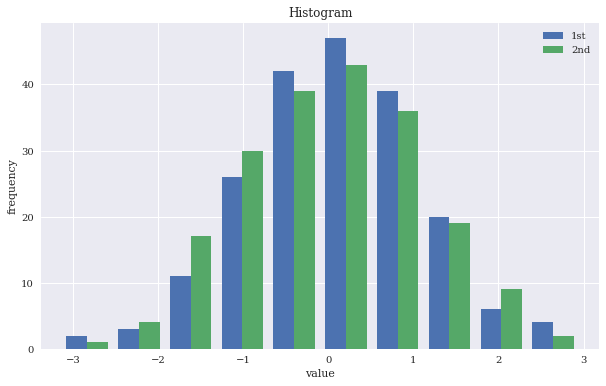

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=10)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

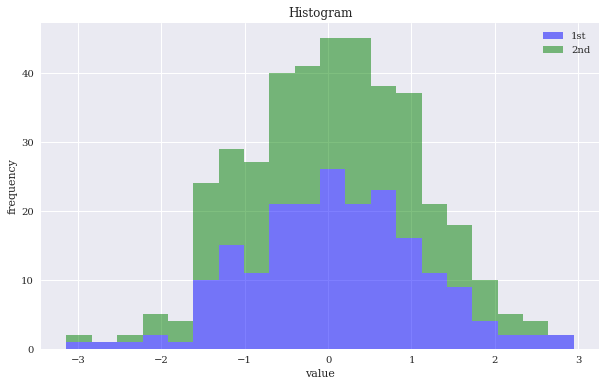

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
         stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

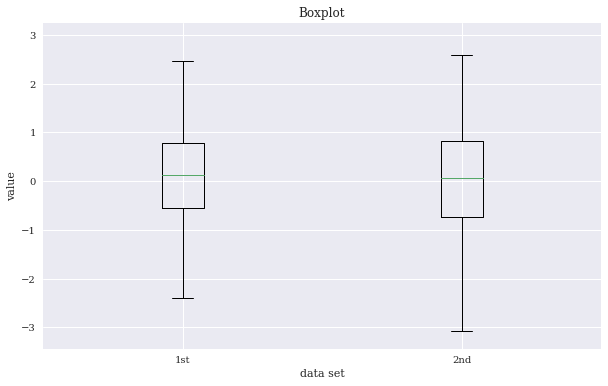

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y) 
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot');

In [6]:
import numpy as np

def func(x):
    return 0.5 * np.exp(x) + 1


a, b = 0.5, 1.5 
x = np.linspace(0, 2, 100)
y = func(x)
# print(x)
# print(y)
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)] 


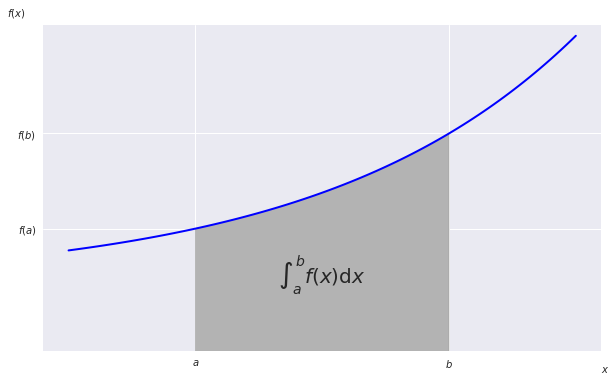

In [7]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 1, r'$\int_a^b f(x)\mathrm{d}x$',
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'));

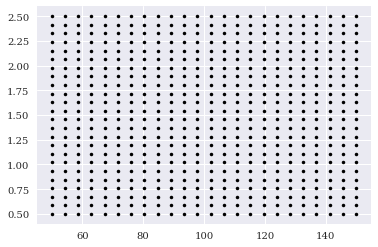

In [38]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
plt.plot(strike, ttm, marker = '.', color='k', linestyle='none')

In [35]:

import math
# iv = (strike - 100) ** 2 / (100 * strike) / ttm

iv = (np.sin(strike**2 + ttm**2) / (strike**2 + ttm**2))

# iv[:5, :3]

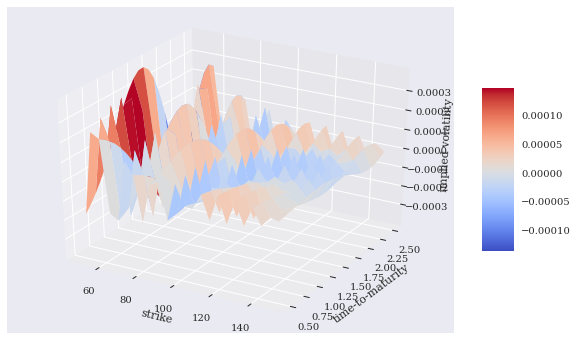

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

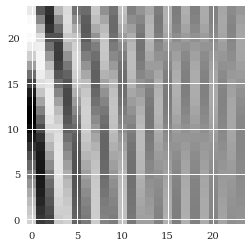

In [36]:
plt.imshow(iv, origin='lower', interpolation='none')
plt.show()

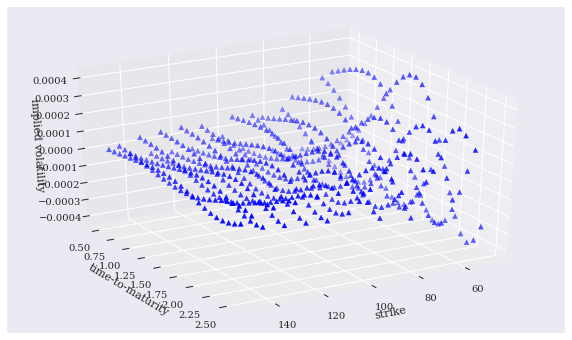

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');